<a href="https://colab.research.google.com/github/StoneAustin/Biomass-Scaling/blob/main/1_Exploring_Biomass_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Biomass Data

In this noteboook, we will take the biomass data collected by the USDA ARS in Tifton and explore the characteristics of biomass measures as we prepare it for prediction over a raster surface.

**Step 1:** Read the Excel Spreadsheets and understand what data is included.

**Step 2:** Clean data and create pivot tables to help visualize dsitribtuion of data.

**Step 3:** Create a series of visualizations to view data.

**Step 4:** Merge tables and create a correlation matrix (optional).

**Step 5:** Save merged dataframe as a csv file for future use.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis Files/Tifton_JECAM_Biomass_2018_REV.xlsx'
df = pd.read_excel(file_path, sheet_name = ['Metadata','Tifton_JECAM_Biomass_2018_REV'])

file_path2 = '/content/drive/MyDrive/Colab Notebooks/Thesis Files/Tifton_JECAM_CropHeight_2018.xlsx'
df2 = pd.read_excel(file_path2, sheet_name = ['Metadata','AveCropH'])

In [49]:
# Using Pandas we will read in our Excel Spreadsheet
# Since we know the sheet names in the file, we can go ahead and list them
# If you do not know the sheet names you can replace with "sheet_name = None"
#df = pd.read_excel('F:\Thesis Work\Tables\Tifton_JECAM_Biomass_2018_REV.xlsx', sheet_name = ['Metadata','Tifton_JECAM_Biomass_2018_REV'])

In [50]:
# We already know the column names, but in case you do not you can use the keys function to identify them
df.keys()

dict_keys(['Metadata', 'Tifton_JECAM_Biomass_2018_REV'])

In [51]:
# Show the contents of the 'Metadata' sheet
# This is useful because now we can understand what each column represents
df['Metadata']

,Column,Variable Name,Description
0,1,Date,Date of observation (year and day of year -- y...
1,2,Idkey,Unique identifier of farm and sample point; jo...
2,3,Field_Id,Unique field identifier
3,4,Site_ID,Unique site identifier
4,5,WetWeight_G,Wet weight of sample (tared; grams)
5,6,DryWeight_G,Dry weight of sample (tared; grams)
6,7,BagWeight_G,Bag weight (grams)
7,8,PWC,Plant water content (grams; wet weight - dry w...
8,9,PD_m2,Plant density: Pspace/RowSpace_mx10m
9,10,AreaPWC_g_m2,Area plant water content (grams/m2; PWC/10 * P...


In [52]:
# Show the contents of the 'Tifton_JECAM_Biomass_2018_REV' sheet
df['Tifton_JECAM_Biomass_2018_REV'].head()

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes
0,2018169,102,1100,2,60.39,136.07,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...
1,2018169,114,1100,14,70.67,200.80,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...
2,2018169,128,1100,28,59.87,128.60,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...
3,2018169,120,1102,20,53.75,110.35,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...
4,2018169,132,1102,32,63.07,139.97,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...


In [53]:
# This dataset contains biomass data from two seperate fields
# We only want to include data from the field whose "Idkey" column starts with "1"
temp = df['Tifton_JECAM_Biomass_2018_REV']
field1_bm = temp.loc[temp['Idkey'] <= 200]
temp2 = df2['AveCropH']
croph = temp2.loc[temp2['Idkey'] <= 200]
field1_bm.head()

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes
0,2018169,102,1100,2,60.39,136.07,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...
1,2018169,114,1100,14,70.67,200.80,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...
2,2018169,128,1100,28,59.87,128.60,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...
3,2018169,120,1102,20,53.75,110.35,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...
4,2018169,132,1102,32,63.07,139.97,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...


In [54]:
# One thing we know about this data is that each biomass measure is the sum of 10 sampled crops within the field - so we need to create a column that give us the indivudual plan biomass

field1_bm['wet_biomass_10_plants'] = field1_bm['WetWeight_G']
field1_bm['dry_biomass_10_plants'] = field1_bm['DryWeight_G']
field1_bm['WetWeight_G'] = field1_bm['WetWeight_G'] / 10
field1_bm['DryWeight_G'] = field1_bm['DryWeight_G'] / 10
field1_bm.head()

<ipython-input-54-42a80c6ce491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field1_bm['wet_biomass_10_plants'] = field1_bm['WetWeight_G']
<ipython-input-54-42a80c6ce491>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field1_bm['dry_biomass_10_plants'] = field1_bm['DryWeight_G']
<ipython-input-54-42a80c6ce491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes,wet_biomass_10_plants,dry_biomass_10_plants
0,2018169,102,1100,2,6.039,13.607,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...,136.07,60.39
1,2018169,114,1100,14,7.067,20.080,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...,200.80,70.67
2,2018169,128,1100,28,5.987,12.860,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...,128.60,59.87
3,2018169,120,1102,20,5.375,11.035,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...,110.35,53.75
4,2018169,132,1102,32,6.307,13.997,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...,139.97,63.07


In [55]:
# Here, I want to take my date column and convert it from Julian dates to regular dates using datetime.

import datetime

field1_bm['Datetime'] = field1_bm['Date'].astype(str).str.slice(start=4, stop=8)
field1_bm ['Datetime'] = pd.to_datetime(field1_bm['Datetime'], format='%j')
field1_bm ['Datetime'] = field1_bm['Datetime'].apply(lambda x: x.replace(year=2018))
field1_bm.head()

<ipython-input-55-d543cad8809c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field1_bm['Datetime'] = field1_bm['Date'].astype(str).str.slice(start=4, stop=8)
<ipython-input-55-d543cad8809c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field1_bm ['Datetime'] = pd.to_datetime(field1_bm['Datetime'], format='%j')
<ipython-input-55-d543cad8809c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,Date,Idkey,Field_Id,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,Notes,wet_biomass_10_plants,dry_biomass_10_plants,Datetime
0,2018169,102,1100,2,6.039,13.607,48.29,27.39,6.444201,17.650667,68.796992,Wet weights not tared. PWC value accounts for ...,136.07,60.39,2018-06-18
1,2018169,114,1100,14,7.067,20.080,49.32,80.81,4.923414,39.786105,46.653024,Wet weights not tared. PWC value accounts for ...,200.80,70.67,2018-06-18
2,2018169,128,1100,28,5.987,12.860,46.75,21.98,5.853392,12.865755,73.145999,Wet weights not tared. PWC value accounts for ...,128.60,59.87,2018-06-18
3,2018169,120,1102,20,5.375,11.035,50.15,6.45,6.487965,4.184737,89.285714,Wet weights not tared. PWC value accounts for ...,110.35,53.75,2018-06-18
4,2018169,132,1102,32,6.307,13.997,48.65,28.25,6.061269,17.123085,69.064827,Wet weights not tared. PWC value accounts for ...,139.97,63.07,2018-06-18


In [56]:
# I want to apply the same conversion with our crop height data as well.

croph['Datetime'] = croph['Date'].astype(str).str.slice(start=4, stop=8)
croph['Datetime'] = pd.to_datetime(croph['Datetime'], format='%j')
croph['Datetime'] = croph['Datetime'].apply(lambda x: x.replace(year=2018))
croph.head()

<ipython-input-56-2265d60a693b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croph['Datetime'] = croph['Date'].astype(str).str.slice(start=4, stop=8)
<ipython-input-56-2265d60a693b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  croph['Datetime'] = pd.to_datetime(croph['Datetime'], format='%j')
<ipython-input-56-2265d60a693b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Date,Idkey,Field_Id,Site_ID,CropHeight_AVG_CM,Notes,Datetime
0,2018156,102,1100,2,8.71,NaN,2018-06-05
1,2018156,114,1100,14,10.33,NaN,2018-06-05
2,2018156,128,1100,28,7.98,NaN,2018-06-05
3,2018156,120,1102,20,7.33,NaN,2018-06-05
4,2018156,132,1102,32,7.44,NaN,2018-06-05


In [57]:
#Creating a Pivot Table so that way I can visualize the data better and create visualizations
pivot_table1 = pd.pivot_table(field1_bm, values=['DryWeight_G','WetWeight_G','PWC','PD_m2','PWC_g_m2','PWC_PCT'],index='Datetime', columns="Idkey", aggfunc='sum')
pivot_table1.head()

<ipython-input-57-033b84d75655>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table1 = pd.pivot_table(field1_bm, values=['DryWeight_G','WetWeight_G','PWC','PD_m2','PWC_g_m2','PWC_PCT'],index='Datetime', columns="Idkey", aggfunc='sum')


DryWeight_G                                               \
Idkey              102      114      120      128      132      139   
Datetime                                                              
2018-06-18       6.039    7.067    5.375    5.987    6.307    6.053   
2018-07-12      60.700   73.700   51.800   60.100   59.700   59.100   
2018-08-03      87.600   92.500   59.800   74.300   78.300   81.500   
2018-08-31     137.300  184.200  152.700  113.900  150.500  127.200   
2018-09-21     130.500  135.900  161.700  160.500  102.700  235.100   

           WetWeight_G                                             
Idkey              102     114      120     128      132      139  
Datetime                                                           
2018-06-18      13.607   20.08   11.035   12.86   13.997   13.747  
2018-07-12     179.100  227.60  100.300  169.70  179.500  169.800  
2018-08-03     464.100  441.60  301.000  357.40  353.300  397.500  
2018-08-31     623.200  676.00  596.500  461.60  580.600  514.000  
2018-09-21     424.400  368.90  431.300  473.70  335.800  644.500

In [58]:
pivot_table2 = pd.pivot_table(field1_bm, values=['PWC','PD_m2'], index='Datetime', columns="Idkey", aggfunc='sum')
pivot_table2.head()

PD_m2                                                    \
Idkey            102       114       120       128       132       139   
Datetime                                                                 
2018-06-18  6.444201  4.923414  6.487965  5.853392  6.061269  5.371991   
2018-07-12  6.444201  4.923414  6.487965  5.853392  6.061269  5.371991   
2018-08-03  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   
2018-08-31  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   
2018-09-21  6.444201  4.923414  5.853392  6.487965  6.061269  5.371991   

                PWC                                               
Idkey           102      114      120      128      132      139  
Datetime                                                          
2018-06-18    27.39    80.81     6.45    21.98    28.25    26.77  
2018-07-12   865.00  1220.00   166.00   777.00   879.00   788.00  
2018-08-03  3765.00  3491.00  2412.00  2831.00  2750.00  3160.00  
2018-08-31  4859.00  4918.00  4438.00  3477.00  4301.00  3868.00  
2018-09-21  2939.00  2330.00  2696.00  3132.00  2331.00  4094.00

In [59]:
#Creating a Pivot Table so that way I can visualize the data better and create visualizations
pivot_table3 = pd.pivot_table(croph, values=['CropHeight_AVG_CM'],index='Datetime', columns="Idkey", aggfunc='sum')
pivot_table3.head()

CropHeight_AVG_CM                                   
Idkey                    102     114    120    128    132   139
Datetime                                                       
2018-06-05              8.71   10.33   7.33   7.98   7.44   5.9
2018-06-18             19.90   23.60  13.50  20.40  23.00  18.3
2018-06-29             35.10   43.10  34.70  34.00  36.40  36.7
2018-07-12             70.60   83.10  67.60  70.20  72.90  72.7
2018-07-24             93.70  111.60  84.30  82.20  93.30  90.6

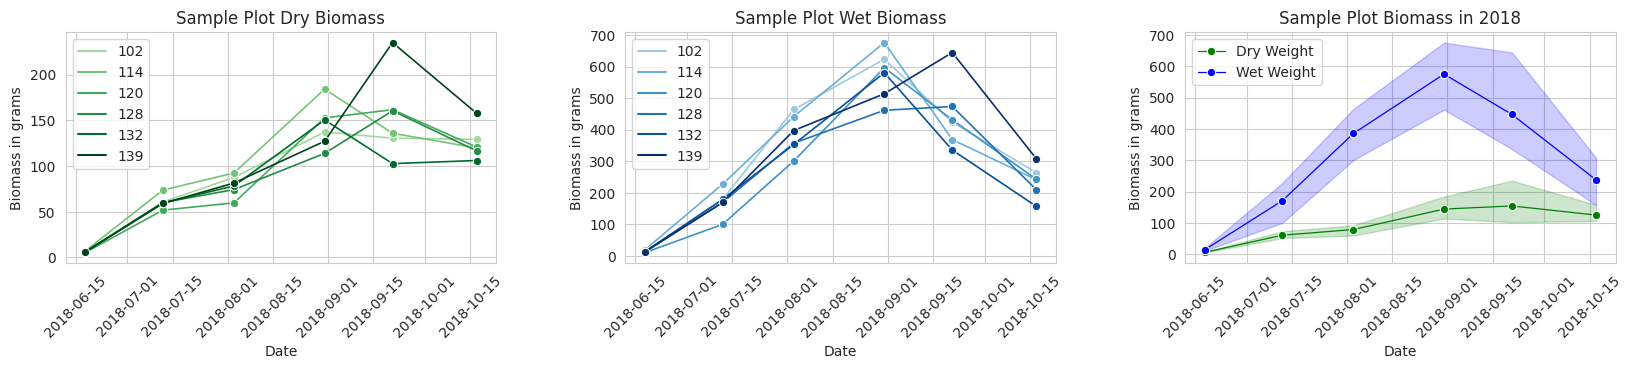

In [60]:
# plot each row as a line using seaborn with markers and smooth lines
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 3))

sns.set_style("whitegrid")
dark_green_palette = sns.color_palette(['#a1d99b','#74c476','#41ab5d','#238b45','#006d2c','#00441b'])
dark_blue_palette = sns.color_palette(['#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b'])

# plot mean values for each column
sns.lineplot(data=pivot_table1['DryWeight_G'], palette=dark_green_palette,dashes=False, marker='o', linewidth=1.2, ax=ax1)
sns.lineplot(data=pivot_table1['WetWeight_G'], palette=dark_blue_palette, dashes=False, marker='o', linewidth=1.2, ax=ax2)


sns.lineplot(x=pivot_table1.index, y=pivot_table1['DryWeight_G'].mean(axis=1), data=pivot_table1, dashes=True, marker='o', linewidth=.9, label='Dry Weight', ax=ax3, color='green')
sns.lineplot(x=pivot_table1.index, y=pivot_table1['WetWeight_G'].mean(axis=1), data=pivot_table1, dashes=True, marker='o', linewidth=.9, label='Wet Weight', ax=ax3, color='blue')

# plot envelope using min and max values for each column
ax3.fill_between(pivot_table1.index, pivot_table1['DryWeight_G'].min(axis=1), pivot_table1['DryWeight_G'].max(axis=1), alpha=0.2, color='green')
ax3.fill_between(pivot_table1.index, pivot_table1['WetWeight_G'].min(axis=1), pivot_table1['WetWeight_G'].max(axis=1), alpha=0.2, color='blue')

# set the plot titles and axis labels
ax1.set_title("Sample Plot Dry Biomass")
ax1.set_xlabel("Date")
ax1.set_ylabel("Biomass in grams")

ax2.set_title("Sample Plot Wet Biomass")
ax2.set_xlabel("Date")
ax2.set_ylabel("Biomass in grams")

ax3.set_title("Sample Plot Biomass in 2018")
ax3.set_xlabel("Date")
ax3.set_ylabel("Biomass in grams")

# rotate the x-axis labels at 45 degrees
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

sns.set_style("whitegrid")

# add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

#adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

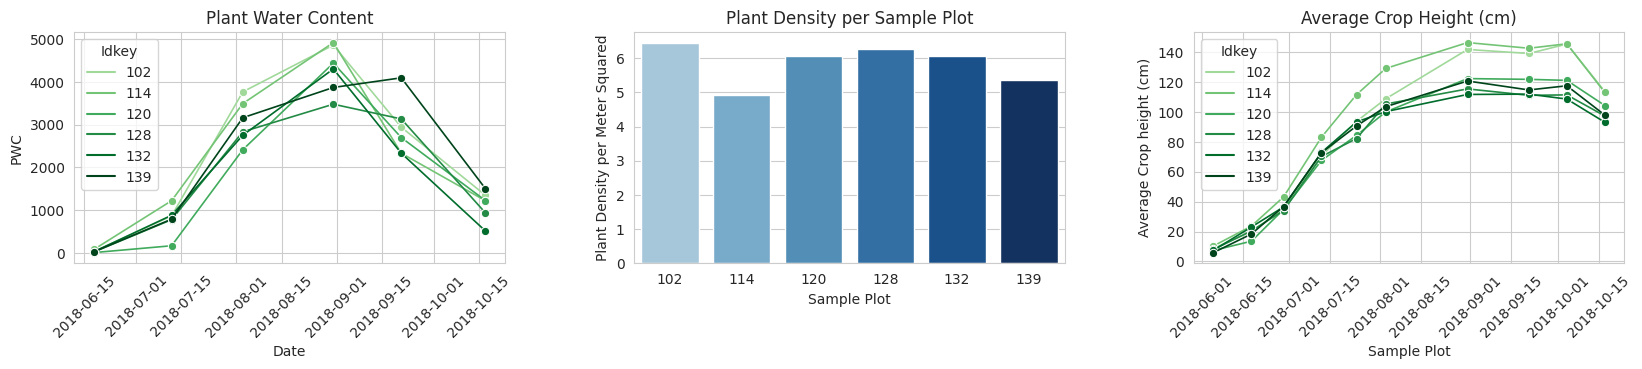

In [61]:

#create two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 3))

#plot the first bar chart
sns.lineplot(data=pivot_table2['PWC'], palette=dark_green_palette,dashes=False, marker='o', linewidth=1.2,ax=ax1)
ax1.set_title("Plant Water Content")
ax1.set_xlabel("Date")
ax1.set_ylabel("PWC")

#plot the second bar chart
sns.barplot(data=pivot_table2['PD_m2'], palette=dark_blue_palette, errorbar = None, ax=ax2)
ax2.set_title("Plant Density per Sample Plot")
ax2.set_xlabel("Sample Plot")
ax2.set_ylabel("Plant Density per Meter Squared")

#Plot crop height
#sns.barplot(data=pivot_table3['CropHeight_AVG_CM'], palette=dark_blue_palette, errorbar = None, ax=ax3)
sns.lineplot(data=pivot_table3['CropHeight_AVG_CM'],palette=dark_green_palette,dashes=False, marker='o', linewidth=1.2,ax=ax3)
ax3.set_title("Average Crop Height (cm)")
ax3.set_xlabel("Sample Plot")
ax3.set_ylabel("Average Crop height (cm)")



ax1.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
#adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# show the plot
plt.show()

In [62]:
# join the two dataframes based on the 'key' column
merged_df = pd.merge(field1_bm, croph, on=['Datetime','Site_ID'])
merged_df = merged_df.drop(['Date_y','Idkey_y',	'Field_Id_y','Notes_y','Notes_x'], axis=1)
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Files/Plot Biomass Measures/biomass_measures.csv', index=False)
merged_df.head()

,Date_x,Idkey_x,Field_Id_x,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,wet_biomass_10_plants,dry_biomass_10_plants,Datetime,CropHeight_AVG_CM
0,2018169,102,1100,2,6.039,13.607,48.29,27.39,6.444201,17.650667,68.796992,136.07,60.39,2018-06-18,19.9
1,2018169,114,1100,14,7.067,20.080,49.32,80.81,4.923414,39.786105,46.653024,200.80,70.67,2018-06-18,23.6
2,2018169,128,1100,28,5.987,12.860,46.75,21.98,5.853392,12.865755,73.145999,128.60,59.87,2018-06-18,20.4
3,2018169,120,1102,20,5.375,11.035,50.15,6.45,6.487965,4.184737,89.285714,110.35,53.75,2018-06-18,13.5
4,2018169,132,1102,32,6.307,13.997,48.65,28.25,6.061269,17.123085,69.064827,139.97,63.07,2018-06-18,23.0


In [63]:
# Not necessary but out of curiosity let's see how correlated our biomass measures are by creating a correlation matrix.
bm = merged_df[['Date_x','DryWeight_G',	'WetWeight_G','PWC','PD_m2','PWC_g_m2','PWC_PCT','CropHeight_AVG_CM']]

<ipython-input-64-a1bc9d81c931>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


<Axes: >

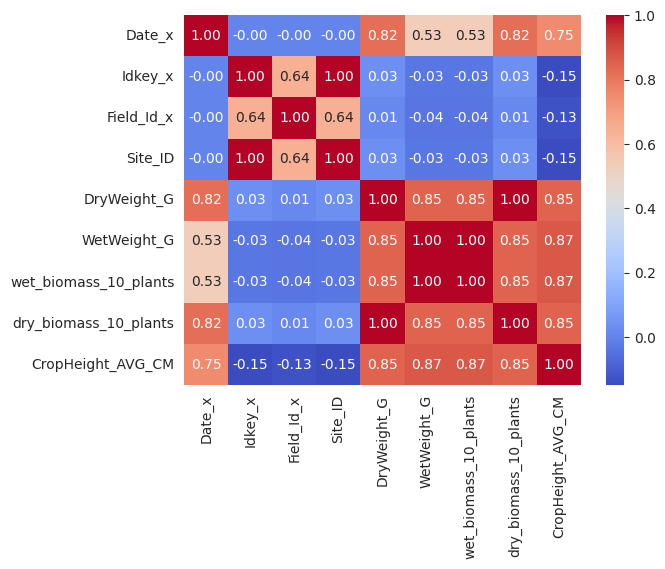

In [64]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')